In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd()) 

C:\Users\matze\Documents\Winton\CRISPDM


In [57]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test_2.csv', index_col=0)

In [58]:
minute_past = train.loc[:,'Ret_2':'Ret_120']+1
minute_fut = train.loc[:,'Ret_121':'Ret_180']+1
minute_past_test = test.loc[:,'Ret_2':'Ret_120']+1

In [59]:
features = pd.DataFrame()
features['Feature_5'] = train.Feature_5.copy()
features['Feature_7'] = train.Feature_7.copy()

features['Ret_MinusOne'] = train.Ret_MinusOne.copy()
features['Ret_MinusTwo'] = train.Ret_MinusTwo.copy()
features['Ret_MinutePast'] = minute_past.prod(axis=1)-1
features['Ret_MinutePast_Test'] = minute_past_test.prod(axis=1)-1
#target
target = pd.DataFrame()
target['Ret_MinuteFut'] = minute_fut.prod(axis=1)-1
target['Ret_PlusOne'] = train.Ret_PlusOne.copy()
target['Ret_PlusTwo'] = train.Ret_PlusTwo.copy()

#both
both = pd.concat([features,target], axis=1)


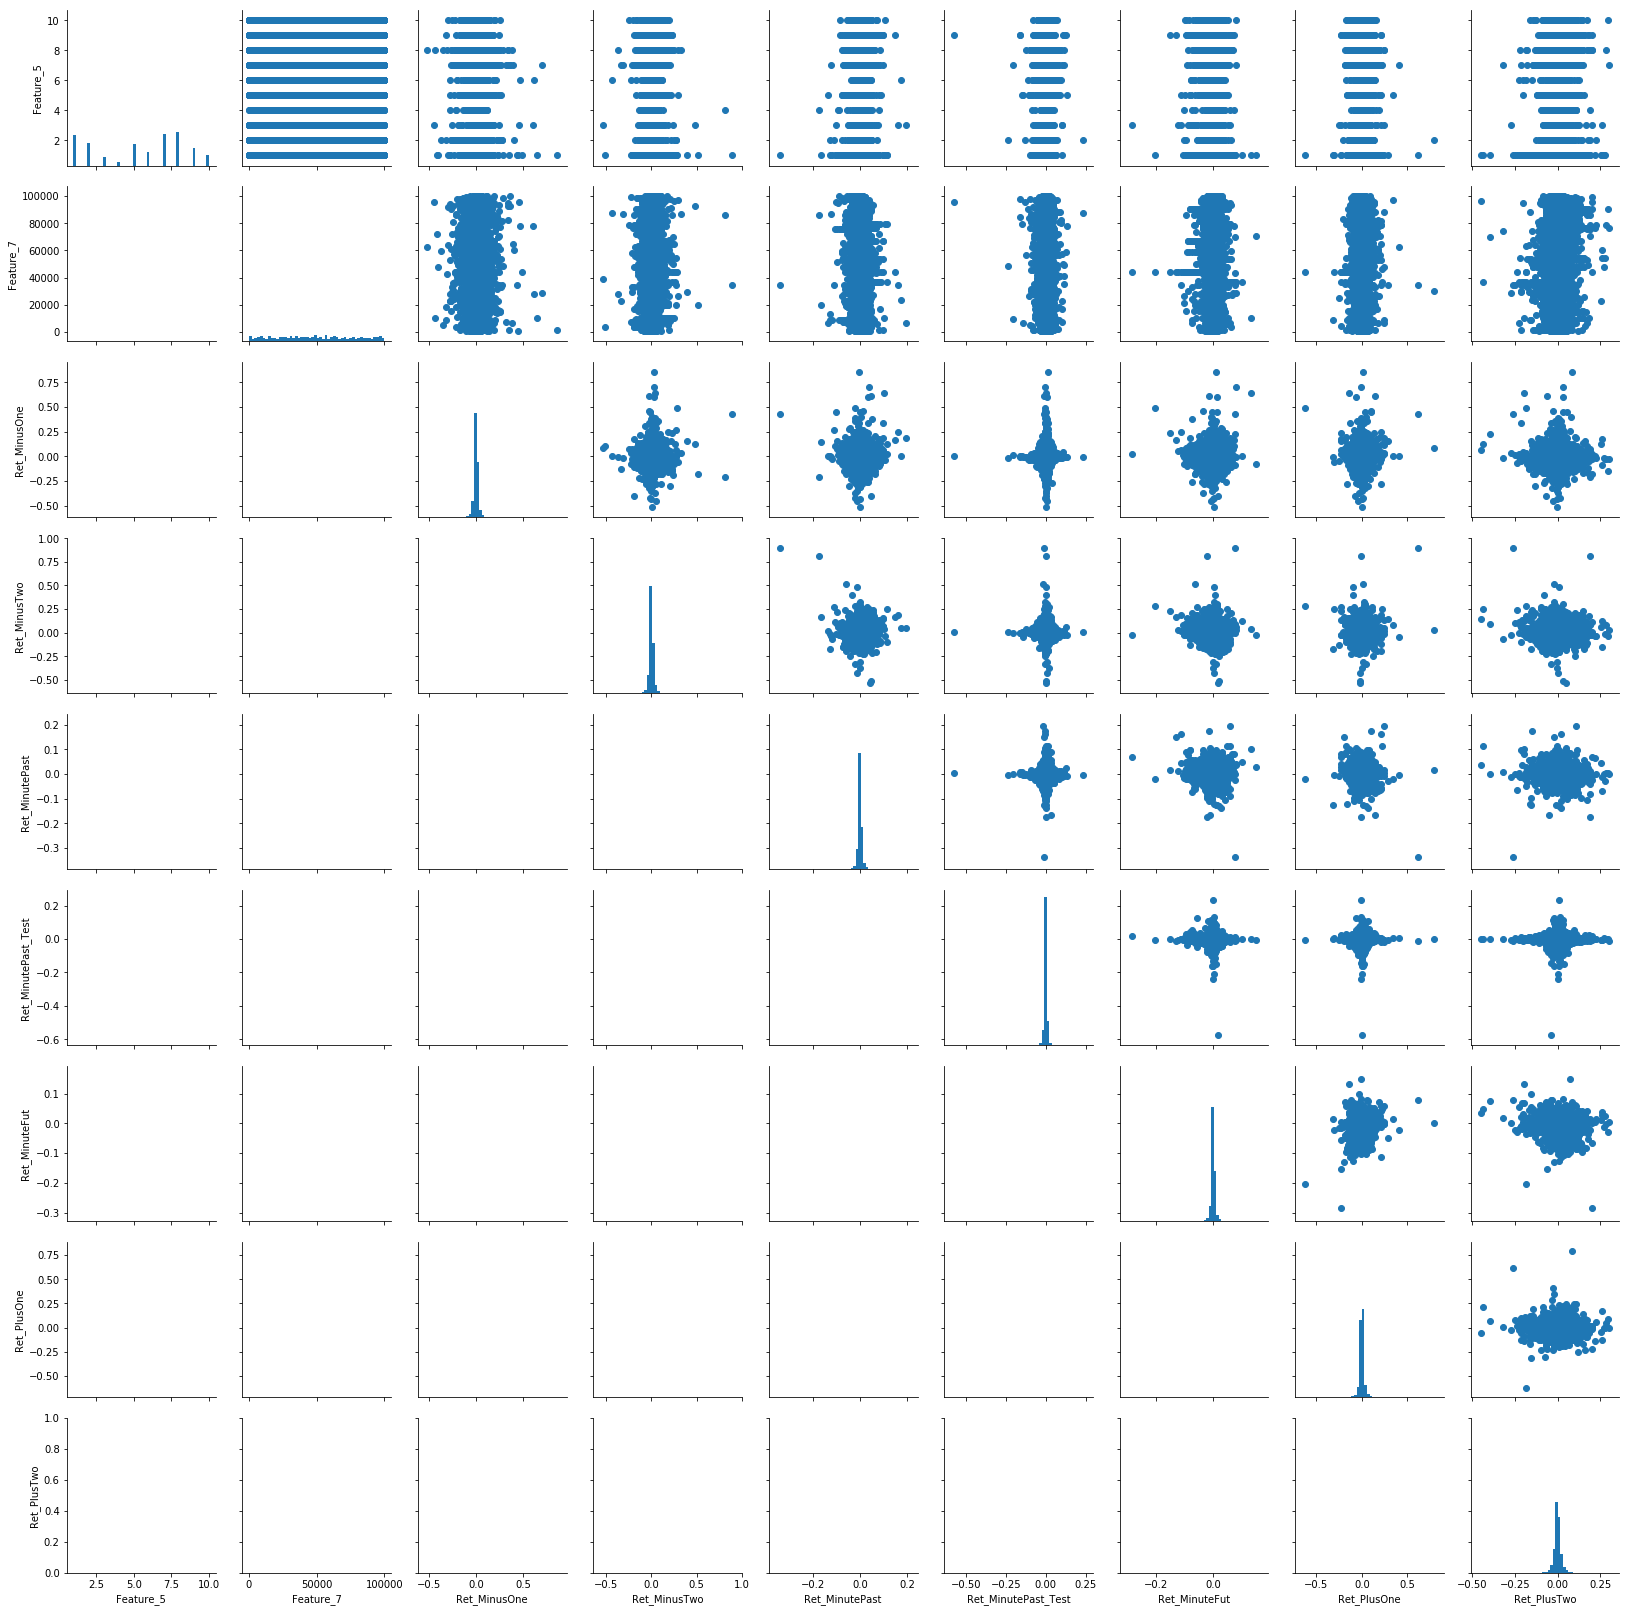

In [5]:
grid = sns.PairGrid(data= both)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter)
#grid = grid.map_upper(corr)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 50);

# Missing Values

In [ ]:
train_missing = pd.DataFrame(train.loc[:,'Feature_1' : 'Feature_25'].isna().sum().sort_values(ascending=True)/40000)
train_missing.columns = ['Values']

test_missing = pd.DataFrame(test.loc[:,'Feature_1' : 'Feature_25'].isna().sum().sort_values(ascending=True)/120000)
test_missing.columns = ['Values']


In [ ]:
sns.set(style="whitegrid")
sns.set_context("talk")
fig, [ax1, ax2] = plt.subplots(1, 2,figsize=(20, 10))


#fig.savefig('example.png')
train_missing.plot.barh(ax=ax1,use_index=True, color= 'steelblue', legend=False,fontsize =20)
test_missing.plot.barh(ax=ax2,use_index=True, color='indianred', legend=False,fontsize =20)
ax1.set_title('Trainingsdaten',fontsize=20)
ax1.set_xlabel('Anteil der fehlenden Werte',fontsize=20)

ax2.set_title('Testdaten',fontsize=22)
ax2.set_xlabel('Anteil der fehlenden Werte',fontsize=20)

fig.suptitle('Anteil der fehlenden Werte nach Features für Traings- und Testdaten',fontsize=20)

fig.savefig('BA_graphs/Anteil Missing Values.jpeg')


In [ ]:
#missing values in daily returns



In [ ]:
train.loc[:,['Ret_MinusOne','Ret_MinusTwo']].isna().sum()
test.loc[:,['Ret_MinusOne','Ret_MinusTwo']].isna().sum()

In [ ]:
display(((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)==0).sum()/40000)
display(((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60).describe())

display(((test.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)==0).sum()/120000)
display(((test.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60).describe())

In [ ]:
pd.DataFrame(((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60),columns=['Missing']).Missing.value_counts().sort_index().plot.bar()

In [ ]:
df = pd.DataFrame((train.loc[:,'Ret_2':'Ret_120']).isna().sum(axis=1)/60,columns=['Missing'])
df.loc[df.Missing !=0].describe()

# EDA

## Feature7

In [ ]:
both.head()

In [60]:
featureset = pd.DataFrame()
featureset = train.loc[:,'Feature_1':'Feature_25']
featureset = pd.concat([featureset,features['Ret_MinusTwo'],features['Ret_MinusOne'],features['Ret_MinutePast'], target], axis=1)
featureset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_22,Feature_23,Feature_24,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_MinutePast,Ret_MinuteFut,Ret_PlusOne,Ret_PlusTwo
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,NaN,...,-0.489492,NaN,NaN,NaN,0.055275,-0.010770,-0.024969,0.000027,-0.019512,0.028846
2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,NaN,...,-0.151805,1.239856,0.953424,-0.709462,0.009748,0.002987,-0.008117,0.001084,-0.002939,-0.010253
3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,...,0.389061,1.728096,-1.798090,-1.019370,0.003077,0.006181,-0.000649,-0.000801,-0.024791,0.015711
4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,...,-2.440799,1.551425,-1.788725,NaN,0.000984,0.014106,0.001272,0.000330,-0.005680,-0.002190
5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.0,...,1.732708,1.965189,-5.993092,3.219820,-0.018224,0.011065,-0.002331,0.003651,0.036104,-0.026552


In [ ]:
corr = abs(featureset.corr(method='spearman'))

In [ ]:
corr

In [ ]:
fig, ax = plt.subplots(figsize=[20,10])
ax = sns.heatmap(corr.loc['Feature_1':'Feature_25','Ret_MinuteFut':'Ret_PlusTwo'], linewidth=0.5,cmap="Blues")

In [ ]:


sns.set(style="whitegrid")
sns.set_context("talk")
fig, ax1 = plt.subplots(figsize=(20, 10))


#fig.savefig('example.png')
corr['Feature_7'].sort_values(ascending = False)[1:].plot.barh(fontsize =20,color=['steelblue'])
#ax1.set_title('Trainingsdaten',fontsize=20)
ax1.set_xlabel('Spearman Korrelation (absolute Werte)',fontsize=20)


fig.suptitle('Korrelation von Feature_7',fontsize=20)

#fig.savefig('BA_graphs/Corr_Fet_7.jpeg')

In [ ]:
corr['Ret_MinuteFut'].sort_values(ascending = False)

## Exploring Feature 7

In [ ]:
exp_train = train.copy()
exp_train['Train or Test'] = 'Train'
exp_test = test.copy()
exp_test['Train or Test'] = 'Test'


In [ ]:


train_count= pd.DataFrame(train.Feature_7.value_counts())
train_count.columns=['count']
train_count['Train or Test'] = 'r'


test_count= pd.DataFrame(test.Feature_7.value_counts())
test_count.columns=['count']
test_count['Train or Test'] = 'b'


exp_fet7 = pd.concat([train_count,test_count]).sort_index().reset_index()
exp_fet7.columns=['Feature_7','count','Train or Test']
exp_fet7

In [ ]:
#plt.plot(date = exp_fet7, x='Feature_7',y='count')


fig, ax = plt.subplots(figsize=(20,10)) #define plot area
ax.set_title('Counted Values for Feature 7 for Train and Test')
ax.set_xlabel('Ausprägung für Feature_7')
ax.set_ylabel('Auszug der 100 Ausprägungen von Feature 7')
exp_fet7.iloc[:100,:].plot(kind="bar", x="Feature_7", y = 'count', ax = ax, color=exp_fet7['Train or Test'])


In [ ]:
#sns.barplot(x=exp_fet7["Feature_7"], y=exp_fet7["count"],hue=exp_fet7["Train or Test"])

In [ ]:
exp_fet7_2= pd.DataFrame(pd.concat([exp_train,exp_test]).loc[:,['Feature_7','Train or Test']])
exp_fet7_2

In [ ]:
palette=["C0", "C2"]

fig, ax = plt.subplots(figsize=(10,10)) #define plot area
ax.set_title('Counted Values for Feature 7 for Train and Test')
ax.set_xlabel('Ausprägung für Feature_7')
ax.set_ylabel('Auszug der 100 Ausprägungen von Feature 7')
ax = sns.countplot(x='Feature_7', data=exp_fet7_2,hue='Train or Test',palette = palette)


## Feature 5

In [ ]:
feat_5_counts_train = train['Feature_5'].value_counts(normalize=True)
feat_5_counts_test = test['Feature_5'].value_counts(normalize=True)
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(15,5))
ax1.set_title('Trainingsdaten')
ax1.set_xlabel('Ausprägungen')
ax1.set_ylabel('Relativer Anteil')
feat_5_counts_train.plot.bar(ax =ax1, color=['steelblue','indianred','seagreen','darkkhaki','mediumpurple'
                                             ,'silver','dodgerblue','gold','darkorange','olive'])
#
ax2.set_title('Testdaten')
ax2.set_xlabel('Ausprägungen')
ax2.set_ylabel('Relativer Anteil')
feat_5_counts_train.plot.bar(ax =ax2, color=['steelblue','indianred','seagreen','darkkhaki','mediumpurple'
                                             ,'silver','dodgerblue','gold','darkorange','olive'])

fig.suptitle('Relative Verteilung von Feature_5')
fig.savefig('BA_graphs/Feature 5.jpeg')



In [ ]:
display(feat_5_counts_train.min(), feat_5_counts_train.max())
display(feat_5_counts_test.min(), feat_5_counts_test.max())

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,10))
plt.suptitle('Ret_Minus Two || Ret_MinusOne || Ret_PlusOne || Ret_PlusTwo', fontsize=16)


features.groupby('Feature_5').Ret_MinutePast.mad().plot(kind ='bar', color = 'gray',ax=ax1)
features.groupby('Feature_5').Ret_MinutePast_Test.mad().plot(kind ='bar', color = 'blue',ax=ax2)


In [ ]:
features.head()

## Zeitreihen und renditen

In [ ]:
from scipy.stats import norm
from matplotlib.lines import Line2D

Tagesrenditen = pd.concat([features.Ret_MinusOne]).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(7, 7))
#fig.savefig('example.png')
sns.distplot(Tagesrenditen, ax=ax1, bins=90,kde_kws={"bw":0.01 ,"label": "KDE der Tagesrenditen","kernel":"gau"})
#sns.distplot(Tagesrenditen2, ax=ax1, bins=300,kde_kws={"bw":0.005 ,"label": "Tagesrenditen2"})
sns.distplot(x,kde=True,hist=False,label='Normalverteilung')

#ax1.set_title('Trainingsdaten',fontsize=20)
#ax1.set_xlabel('XXX',fontsize=20)
plt.xlim(-0.2,0.2)
#plt.ylim(0,0.2)

fig.suptitle('Verteilung der vergangenen Tagesrenditen ( Ret_MinusOne)',fontsize=16)
#ax.legend(loc='best')
fig.savefig('BA_graphs/KDE_Ret_MinusOne.jpeg')

In [ ]:
x = np.random.standard_normal(features.Ret_MinusOne.size)
x = (features.Ret_MinusOne.std() * x) + features.Ret_MinusOne.mean()

In [ ]:
features.Ret_MinusOne.std()
features.Ret_MinusOne.mean()
features.Ret_MinusOne.skew()
from scipy import stats
stats.jarque_bera(features.Ret_MinusOne)

In [ ]:
features.groupby(['Feature_7','Feature_5']).mean().reset_index().set_index('Feature_7')[['Feature_5','Ret_MinusOne']]
features.groupby(['Feature_7','Feature_5']).mean()['Ret_MinusOne'].unstack().plot()
features.plot.scatter(x='Feature_7',y='Ret_MinusOne',s=0.5)

In [ ]:
vol_clust = pd.DataFrame(features.Ret_MinusOne.sample(frac=1,random_state =2).values,columns=['Ret_MinusOne'])
vol_clust['Feature_7'] = features.Feature_7.values

fig, [ax1,ax2] = plt.subplots(2,1,figsize=(10,5),sharex=True)
fig.suptitle('vergangene Tagesrenditen (Ret_MinusOne)entlang der Zeitachse (Feature_7)')

features.plot.scatter(x='Feature_7',y='Ret_MinusOne',s=1,ax=ax1)
ax1.set_ylim(-0.4,0.4)
ax1.set_title('empirische Tagesrenditen')

vol_clust.plot.scatter(x='Feature_7',y='Ret_MinusOne',s=1,ax=ax2,c='indianred')
ax2.set_ylim(-0.4,0.4)
ax2.set_title('"durchgemischte" Tagesrenditen')
fig.savefig('BA_graphs/Volatilitätscluster.jpeg')

In [ ]:
train.loc[:,'Ret_2':'Ret_180'].sample(2,random_state=8).index

In [ ]:
first = train.loc[:,'Ret_2':'Ret_180'].sample(2,random_state=8).iloc[0,:] #id: 28023
second = train.loc[:,'Ret_2':'Ret_180'].sample(2,random_state=8).iloc[1,:] #id: 19677


fig, [[ax1,ax2], [ax3, ax4]] = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Beispielhafte Minutenrenditen und deren Kursverlauf')

first.plot.bar(ax=ax1,color = 'steelblue',width =0.8)
ax1.legend_ = None
ax1.xaxis.set_ticks([])
ax1.set_ylabel('ID: Train 28023')
ax1.set_title('Renditen')

first.cumsum().plot(ax=ax2)
ax2.set_title('Kursverlauf')

second.plot.bar(ax=ax3,color='steelblue',width=0.8)
ax3.xaxis.set_ticks([])
ax3.set_xlabel('Ret_2 bis Ret_180')
ax3.set_ylabel('ID: Train 19677')

second.cumsum().plot(ax=ax4)
ax4.set_xlabel('Ret_2 bis Ret_180')
#ax1.set_xlim(auto=True)

fig.savefig('BA_graphs/Minutenrenditen.jpeg')

In [ ]:
#Korrelationen
corr = abs(featureset.corr(method='pearson'))
fig, ax = plt.subplots(figsize=[10,10])
ax = sns.heatmap(corr, linewidth=0.5, vmin=0, vmax=0.5, square=True,cmap='gray',cbar_kws={'fraction': 0.04}) #

ax.set_title('Korrelationsmatrix (absolute Werte)',fontsize=16)
fig.savefig('BA_graphs/Korrelationen.jpeg')

In [ ]:
groups = train.Feature_7.value_counts().sort_values(ascending=False)

corr_1 = abs(featureset.groupby('Feature_7').get_group(groups.index[0]).corr(method='pearson'))

fig, ax1 = plt.subplots(figsize=[10,15])
sns.heatmap(corr_1.loc['Ret_MinuteFut':'Ret_PlusTwo','Feature_1':'Ret_MinutePast'], linewidth=0.5, vmin=0, vmax=0.5, square=True,cmap='gray',ax=ax1,cbar_kws={"orientation":'horizontal'}) #,'label':'Korrelation'
ax1.set_title('Korrelationsmatrix innerhalb einer Gruppe von Feature 7 (absolute Werte)',fontsize=16)


fig.savefig('BA_graphs/Korrelationsmatrix Feature7.jpeg')


In [ ]:
groups = train.Feature_7.value_counts().sort_values(ascending=False)
groups.index[0:5]

values=[]

for group in groups.index:
    corr = featureset.groupby('Feature_7').get_group(group).corr(method='pearson').Ret_MinutePast
    values.append(corr.Ret_MinuteFut)
values

In [ ]:
xxx = abs(pd.DataFrame(values,columns=['Values'],index=groups.index.values))
xxx['mean'] = train.groupby('Feature_7').Feature_25.mean()
xxx['mad'] = train.groupby('Feature_7').Feature_25.mad()
xxx.Values.mean()

In [ ]:
train.groupby('Feature_7').get_group(37168).Feature_25.mean()


In [ ]:
train.loc[train.Feature_25<1].plot.scatter(x='Feature_25',y='Ret_PlusOne',s=0.5)
df = (train.loc[train.Feature_25<1].loc[:,['Feature_5','Feature_25','Ret_PlusOne']])
df.plot.scatter(x='Feature_25',y='Ret_PlusOne',s=0.5)


In [ ]:
train.groupby('Feature_7').get_group(8879).plot.scatter(x='Feature_13',y='Ret_PlusOne',s=0.5)

In [ ]:
train.Feature_25.isna().sum()

In [ ]:
groups

# ZeroBenchmark und Base Models

In [61]:
def trainscore(y_true,y_pred,weights):
    daily = pd.concat([weights.Weight_Daily]*2,axis=1)
    minute = pd.concat([weights.Weight_Intraday]*60,axis=1)
    weights = pd.concat([minute,daily],axis=1)
    weights.columns = y_true.columns
    
    
    wmea = (((abs(y_true-y_pred))*weights).values.flatten().sum()/y_true.size)
    
    
    #minute_ret = abs(y_true.loc[:,'Ret_121':'180']-y_pred.loc[:,'Ret_121':'Ret_180'])*weights.Weight_Intraday
    return wmea
    

In [62]:
y=train.loc[:,'Ret_121':'Ret_PlusTwo']
weights = train.loc[:,'Weight_Intraday':'Weight_Daily']
#trainscore(y,train.loc[:,'Ret_121':'Ret_PlusTwo'],weights)

In [63]:
grid = pd.DataFrame(np.zeros([40000, 62]), columns = y.columns,index=y.index)

In [64]:
trainscore(y,grid,weights).round(5)

1773.9244

In [10]:
from sklearn.metrics import mean_absolute_error

((abs((y.Ret_121 - grid.Ret_PlusOne)))*weights.Weight_Daily).sum()/40000
mean_absolute_error(grid,y).round(5)

0.00111

In [11]:
grid.sum().sum()

0.0

In [12]:
from sklearn.model_selection import train_test_split

    

In [13]:
for random_state in [10,20,30]:
    X_split = train.loc[:,'Feature_1':'Ret_120']
    y_split = train.loc[:,'Ret_121':'Weight_Daily']
    X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.25, random_state=random_state)

    train_weights = y_train[['Weight_Intraday','Weight_Daily']]
    test_weights = y_test[['Weight_Intraday','Weight_Daily']]
    y_train = y_train.drop(train_weights.columns.values,axis='columns')
    y_test = y_test.drop(test_weights.columns.values,axis='columns')

    grid_train = pd.DataFrame(np.zeros(y_train.shape), columns = y_train.columns,index=y_train.index)
    grid_test = pd.DataFrame(np.zeros(y_test.shape), columns = y_test.columns,index=y_test.index)

    print(random_state,trainscore(y_train,grid_train,train_weights).round(6), trainscore(y_test,grid_test,test_weights).round(6))
    

10 1774.320947 1772.734739
20 1772.171982 1779.181636
30 1778.381342 1760.553556


# Base Models

In [117]:
#for cols in featureset.columns:
#    print(cols, featureset[cols].nunique())

def typecasting(df):
    categorial_cols = ['Feature_20','Feature_5']
    binary_cols = ['Feature_16']

    for col in categorial_cols:
        df[col] = df[col].astype('category')
    
    for col in binary_cols:
        df[col] = (df[col]-1).astype('category')

#typecasting(X_train)

In [136]:

X_train = featureset.drop(['Feature_7','Feature_1','Feature_10','Ret_MinutePast','Ret_MinuteFut','Ret_PlusOne','Ret_PlusTwo'],axis='columns')
y_train = target[['Ret_PlusOne','Ret_PlusTwo']]

X_test = test[X_train.columns].copy()


from sklearn.linear_model import Ridge
from sklearn.preprocessing import Imputer

typecasting(X_train)
X_train = pd.get_dummies(X_train,drop_first=True)

typecasting(X_test)
X_test = pd.get_dummies(X_test,drop_first=True)

imputer = Imputer(strategy='mean', axis=0)
X_train = pd.DataFrame(imputer.fit_transform(X_train), index= X_train.index,columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), index= X_test.index,columns=X_test.columns)

ridge = Ridge(random_state = 1,normalize=True)
ridge.fit(X_train,y_train)

grid = pd.DataFrame(np.zeros([40000, 62]), columns = y.columns,index=y.index)
predict = ridge.predict(X_train)
grid['Ret_PlusOne'] = predict[:,0]
grid['Ret_PlusTwo'] = predict[:,1]
trainscore(y,grid,weights).round(5) #mit feature 7 1773.73721 #ohne feature 7 1773.64448

1773.64448

In [133]:
X_test.head()

,Feature_2,Feature_3,Feature_4,Feature_6,Feature_7,Feature_8,Feature_9,Feature_11,Feature_12,Feature_13,...,Feature_5_10.0,Feature_16_1.0,Feature_20_3.0,Feature_20_4.0,Feature_20_5.0,Feature_20_6.0,Feature_20_7.0,Feature_20_8.0,Feature_20_9.0,Feature_20_10.0
Id,,,,,,,,,,,,,,,,,,,,,
1,1.412783,-0.056284,0.405572,0.413226,18871.0,0.2138,11.0,-0.229910,0.97,8.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.117558,0.907973,1.002425,-0.257825,5852.0,0.2138,13.0,-0.971909,0.93,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.607583,1.076668,0.517865,0.947340,76935.0,0.0105,10.0,-1.096276,0.88,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.230240,0.223222,0.405572,0.430972,84573.0,0.3318,13.0,-0.509942,0.76,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.360399,0.597896,-0.145497,0.275744,89615.0,0.0099,8.0,-1.188949,0.64,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [137]:
sample = pd.read_csv('sample_submission_2.csv')
predict = ridge.predict(X_test[X_train.columns])
grid = pd.DataFrame(np.zeros([120000, 62]), columns = train.loc[:,'Ret_121':'Ret_PlusTwo'].columns,index=test.index)
grid['Ret_PlusOne'] = predict[:,0]
grid['Ret_PlusTwo'] = predict[:,1]
sample['Predicted'] = grid.values.flatten()
sample.to_csv('Base Models/Ridge_ohnefet7.csv', index=False)

In [326]:
## Evaluation of base models

model = ['XGB mit Feature 7', 'XGBoost ohne Feature 7', 'Ridge mit Feature 7', 'Ridge ohne Feature 7']
trainscore = ['1743.86260','1761.23141','1773.73721','1773.64448']
public_lb = ['1781.83630','1771.90291','1770.16277','1770.53665']
private_lb = ['1740.70440','1731.41833','1728.76670','1728.69494']

index = ['Train Score','Public LB', 'Private LB']
Zerobenchmark_train='1773.92440'
scores = pd.DataFrame([trainscore,public_lb,private_lb],columns = model, index=index).astype('float64')

scores

,XGB mit Feature 7,XGBoost ohne Feature 7,Ridge mit Feature 7,Ridge ohne Feature 7
Train Score,1743.8626,1761.23141,1773.73721,1773.64448
Public LB,1781.8363,1771.90291,1770.16277,1770.53665
Private LB,1740.7044,1731.41833,1728.76670,1728.69494


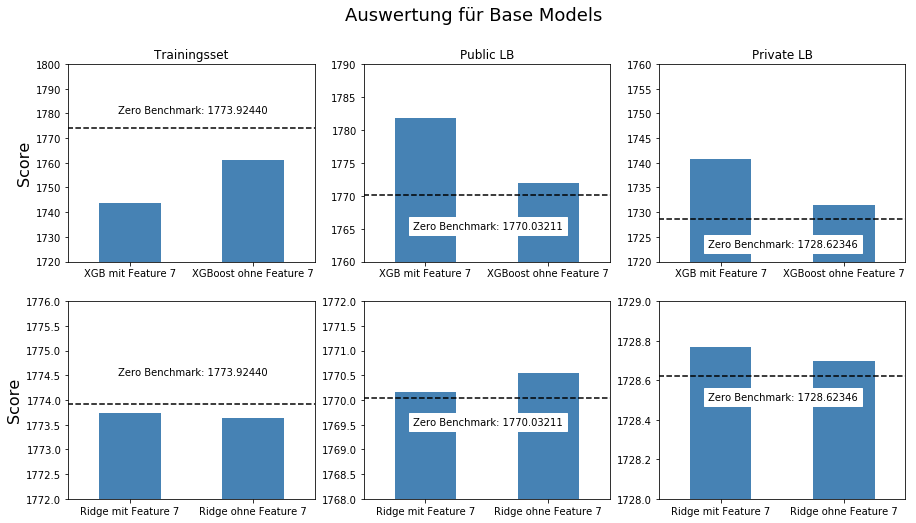

In [327]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3,figsize=(15,8))
fig.suptitle('Auswertung für Base Models',fontsize=18)

scores_xgb = scores.iloc[:,[0,1]]
scores_xgb.loc['Train Score'].plot.bar(ax=ax1,color='steelblue')
ax1.set_ylim(1720,1800)
ax1.hlines(1773.92440,6,-1, color='black',linestyle='dashed')
ax1.text(-0.1, 1780, "Zero Benchmark: 1773.92440",backgroundcolor='White')
ax1.set_title('Trainingsset')
ax1.tick_params(axis='x', rotation=0)
ax1.set_ylabel('Score',fontsize=16)

scores_xgb.loc['Public LB'].plot.bar(ax=ax2,color='steelblue')
ax2.set_ylim(1760,1790)
ax2.hlines(1770.03211,6,-1, color='black',linestyle='dashed')
ax2.text(-0.1, 1765, "Zero Benchmark: 1770.03211",backgroundcolor='White')
ax2.set_title('Public LB')
ax2.tick_params(axis='x', rotation=0)

scores_xgb.loc['Private LB'].plot.bar(ax=ax3,color='steelblue')
ax3.set_ylim(1720,1760)
ax3.hlines(1728.62346,6,-1, color='black',linestyle='dashed')
ax3.text(-0.1, 1723, "Zero Benchmark: 1728.62346",backgroundcolor='White')
ax3.set_title('Private LB')
ax3.tick_params(axis='x', rotation=0)
###################

scores_ridge = scores.iloc[:,[2,3]]
scores_ridge.loc['Train Score'].plot.bar(ax=ax4,color='steelblue')
ax4.set_ylim(1772,1776)
ax4.hlines(1773.92440,6,-1, color='black',linestyle='dashed')
ax4.text(-0.1, 1774.5, "Zero Benchmark: 1773.92440",backgroundcolor='White')
#ax4.set_title('Trainingsset')
ax4.tick_params(axis='x', rotation=0)
ax4.set_ylabel('Score',fontsize=16)

scores_ridge.loc['Public LB'].plot.bar(ax=ax5,color='steelblue')
ax5.set_ylim(1768,1772)
ax5.hlines(1770.03211,6,-1, color='black',linestyle='dashed')
ax5.text(-0.1, 1769.5, "Zero Benchmark: 1770.03211",backgroundcolor='White')
#ax5.set_title('Public LB')
ax5.tick_params(axis='x', rotation=0)

scores_ridge.loc['Private LB'].plot.bar(ax=ax6,color='steelblue')
ax6.set_ylim(1728,1729)
ax6.hlines(1728.62346,6,-1, color='black',linestyle='dashed')
ax6.text(-0.1, 1728.5, "Zero Benchmark: 1728.62346",backgroundcolor='White')
#ax6.set_title('Private LB')
ax6.tick_params(axis='x', rotation=0)

##################
fig.savefig('BA_graphs/Auswertungen Base.jpeg')